<a href="https://colab.research.google.com/github/Brites101/bazicodes/blob/master/GraphQL_to_Pandas_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
import pandas.io.json as pd_json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


!pip install gql -q

from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

# EXPA Token request

currently not working.

Access [token generator](http://token.aiesec.org.br/get_token.php?token=c0aa46e01d77fb212fe0195636fb515f8e43b530087399ec49f) and paste the token below

In [0]:
#access_token = requests.get("http://token.aiesec.org.br/get_token.php?token=c0aa46e01d77fb212fe0195636fb515f8e43b530087399ec49f")
#print(access_token)


In [0]:
## This link generates an access token to EXPA
#token_get_url = "http://token.aiesec.org.br/get_token.php?token=c0aa46e01d77fb212fe0195636fb515f8e43b530087399ec49f"


## This function returns an access token for EXPA
#def get_access_token(token_get_url):
#    # Get the access token from an external URL
#    access_token = requests.get(token_get_url)
#
#    # Check if we have a valid access token
#    if access_token.status_code != 200:
#        raise Exception('Unable to get access token', 'ACCESS_TOKEN_INVALID_STATUS', access_token.status_code)
#
#    if len(access_token.text.strip()) != 64:
#        raise Exception('Invalid access token ' + access_token.text, 'ACCESS_TOKEN_INVALID_TEXT', access_token.text)
#
#    # Return the access token
#    return access_token.text.strip()

# GraphQL Query

In [0]:
#request Token from user
access_token = str(input("Insert your EXPA Token: "))
print("Token acquired.")

In [0]:
#calls a query from the GraphQL API

_transport = RequestsHTTPTransport(
    url='https://gis-api.aiesec.org/graphql?access_token='+str(access_token),
    use_json=True,
)


client = Client(
    transport=_transport,
    fetch_schema_from_transport=True,
)
#Here you insert the query
query = gql("""
{
  allOpportunityApplication(filters: {created_at: {from:"2019-01-01T22:00:00Z", to:"2019-07-01T22:00:00Z"}, programmes:2, person_home_mc: 1606},per_page:4000, page: 1) 
  {
    data {
      person {
        id
        status
        opportunity_applications_count        
              } 
         }
  }
}
""")

query_json=client.execute(query)

print(query_json)

In [0]:
#Flatten JSON into a dataframe

query_df = json_normalize(query_json['allOpportunityApplication']['data'])
query_df.head()

In [0]:
query_df.describe()

In [0]:
query_df['person.status'].unique()

array(['applied', 'approved', 'accepted', 'realized', 'deleted',
       'completed'], dtype=object)

In [0]:
query_df = query_df[query_df["person.opportunity_applications_count"] < 700]

Text(0.5, 0, "Applicant's Latest Status")

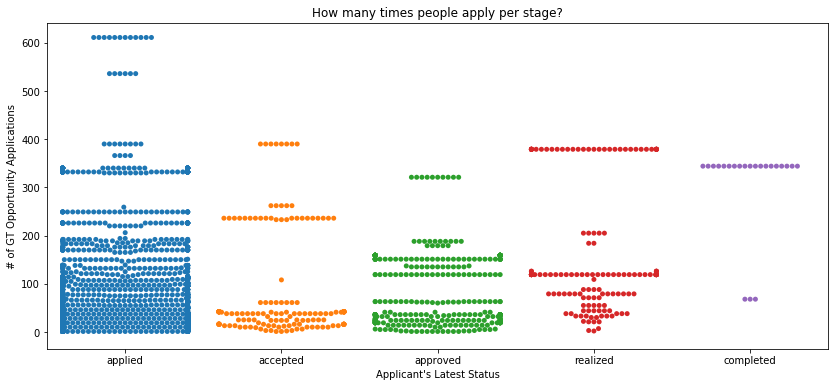

In [0]:
plt.figure(figsize=(14,6))

plt.title("How many times people apply per stage?")



sns.swarmplot(x=query_df['person.status'],
              y=query_df['person.opportunity_applications_count'],
              order=["applied", "accepted", "approved", "realized", "completed"])

plt.ylabel("# of GT Opportunity Applications")

plt.xlabel("Applicant's Latest Status")